In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
arg_data=pd.read_csv("graphing_tabs/final_ARG_tab_for_heatmap.txt", sep='\t')
arg_data

,Unnamed: 0,file,rep,sample,patient,time,exp,gene,num,blast_hit,...,Family,Genus,sum_size,blast_summary,otu,sample_size,read%,taxa,cut_off,detections
0,50,037-B335_1-CTX,A,B335-1,B335,1,multi,CTX,37,chimera,...,na,na,75,na,otu1,7966,0.941501,na na na na na,1,4
1,51,038-B335_1-CTX,B,B335-1,B335,1,multi,CTX,38,chimera,...,na,na,104,na,otu3,9345,1.112895,na na na na na,1,4
2,52,039-B335_1-CTX,C,B335-1,B335,1,multi,CTX,39,chimera,...,na,na,134,na,otu334,13339,1.004573,na na na na na,1,4
3,53,040-B335_1-CTX,D,B335-1,B335,1,multi,CTX,40,chimera,...,na,na,100,na,otu59,11593,0.862589,na na na na na,1,4
4,58,037-B335_1-CTX,A,B335-1,B335,1,multi,CTX,37,CTX_G1_15_C52,...,Enterobacteriaceae(100),Klebsiella(62),7483,100.0;20;0;0;1;20;1;20;1.67e-08,otu12,7966,93.936731,Proteobacteria Gammaproteobacteria Enterobacte...,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,997,060-Single-NEG_TEM-A,A,NEG-0,NEG,0,Single,TEM,60,TEM_183_C16,...,Enterobacteriaceae(100),Klebsiella(62),58,100.0;75;0;0;1;75;2;76;1.28e-40,otu1,60,96.666667,Proteobacteria Gammaproteobacteria Enterobacte...,1,3
155,998,068-Single-NEG_TEM-B,B,NEG-0,NEG,0,Single,TEM,68,TEM_183_C16,...,Enterobacteriaceae(100),Klebsiella(62),32929,100.0;75;0;0;1;75;2;76;1.28e-40,otu9,56505,58.276259,Proteobacteria Gammaproteobacteria Enterobacte...,1,3
156,999,076-Single-NEG_TEM-C,C,NEG-0,NEG,0,Single,TEM,76,TEM_183_C16,...,Enterobacteriaceae(100),Klebsiella(62),3,100.0;75;0;0;1;75;2;76;1.28e-40,otu40,3,100.000000,Proteobacteria Gammaproteobacteria Enterobacte...,1,3
157,724,062-Single-B335-2_CTX-M-B,B,B335-2,B335,2,Single,CTX,62,CTX_G1_15_C52,...,Peptostreptococcaceae(100),Romboutsia(100),10316,100.0;20;0;0;1;20;1;20;1.67e-08,otu32,92903,11.104055,Firmicutes Clostridia Clostridiales Peptostrep...,1,2


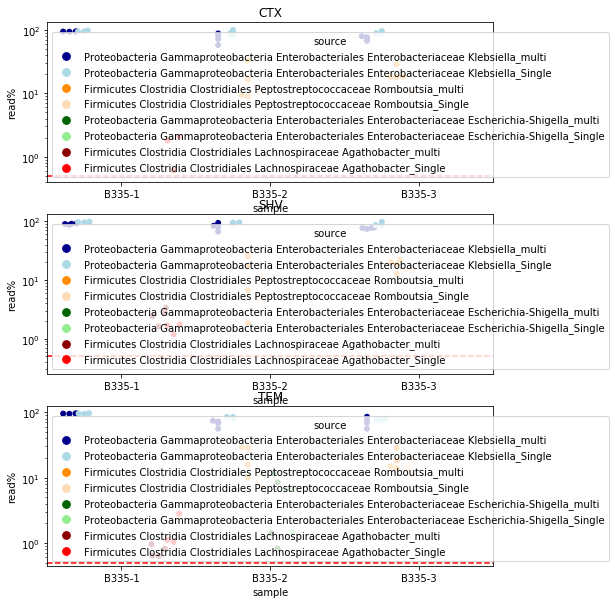

In [121]:
graph_df=arg_data[arg_data["blast_hit"]!="chimera"]
graph_df=graph_df[graph_df["patient "]!="NEG"]
graph_df["source"]=graph_df["taxa"]+"_"+graph_df["exp"]
sample=["B335-1","B335-2","B335-3"]
genes=["CTX","SHV","TEM"]
hue_order=["Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella_multi","Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella_Single",
           "Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia_multi","Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia_Single",
           "Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella_multi","Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella_Single",
           "Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter_multi","Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter_Single"]
palette = ['darkblue','lightblue','darkorange','peachpuff','darkgreen','lightgreen','darkred','red']
f, axes = plt.subplots(3, figsize=(8,10), squeeze=False)
plt.rcParams['svg.fonttype'] = 'none'
for i in range(3):
    sns.swarmplot(x="sample", y="read%", hue="source", data=graph_df[graph_df['gene']==genes[i]], dodge=True, size=6, 
                  hue_order=hue_order, palette=palette, ax=axes[i][0]).set_title(genes[i])
    
    axes[i][0].set_yscale("log")
    axes[i][0].axhline(0.5, color='r', ls='--')
plt.savefig("B335_ARG_swarm3_split_exp.svg", format='svg')



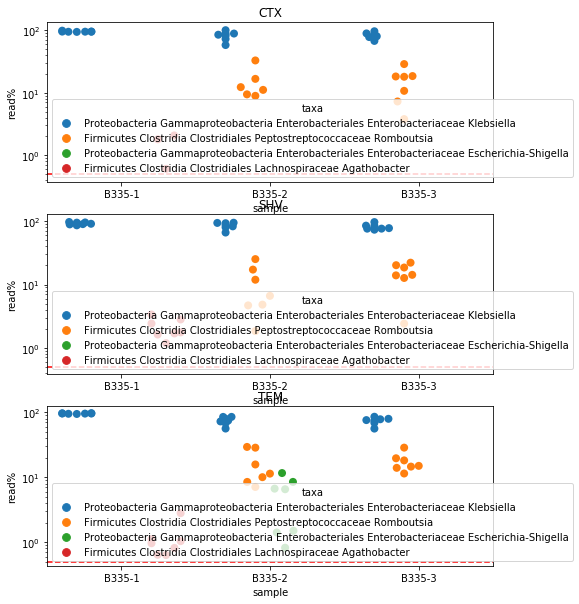

In [113]:
graph_df=arg_data[arg_data["blast_hit"]!="chimera"]
graph_df=graph_df[graph_df["patient "]!="NEG"]
graph_df["source"]=graph_df["taxa"]+"_"+graph_df["exp"]
sample=["B335-1","B335-2","B335-3"]
genes=["CTX","SHV","TEM"]
hue_order=["Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella","Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia",
           "Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella","Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter"]
f, axes = plt.subplots(3, figsize=(8,10), squeeze=False)
plt.rcParams['svg.fonttype'] = 'none'
for i in range(3):
    sns.swarmplot(x="sample", y="read%", hue="taxa", data=graph_df[graph_df['gene']==genes[i]], dodge=True, size=8, 
                  hue_order=hue_order, ax=axes[i][0]).set_title(genes[i])
    
    axes[i][0].set_yscale("log")
    axes[i][0].axhline(0.5, color='r', ls='--')
#plt.savefig("B335_ARG_swarm2_no-dodge.svg", format='svg')

In [84]:
untrimmed_df=pd.read_csv("full_df.txt",sep='\t')
print(untrimmed_df.shape)
taxa_names_df = untrimmed_df[['Phylum', 'Class', 'Order', 'Family', 'Genus']]
taxa_names_df = taxa_names_df.apply(lambda x: x.str.split('(',1) if x.dtype == "object" else x)
new_tax_list = []
for index, row in taxa_names_df.iterrows():
    new_name=row['Phylum'][0]+" "+row['Class'][0]+" "+row['Order'][0]+" "+row['Family'][0]+" "+row['Genus'][0]
    new_tax_list.append(new_name)
untrimmed_df['taxa']=new_tax_list
#untrimmed_df=untrimmed_df.drop_duplicates(['gene','taxa','rep','exp','sample'])
untrimmed_df.head(2)

(1210, 23)


,Unnamed: 0,file,rep,sample,patient,time,exp,gene,num,blast_hit,...,Order,Family,Genus,sum_size,blast_summary,otu,sample_size,read%,taxa,cut_off
0,0,037-B335_1-CTX,A,B335-1,B335,1,multi,CTX,37,CTX_G1_15_C52,...,Bacteroidales(100),Bacteroidaceae(100),Bacteroides(100),51,100.0;20;0;0;1;20;1;20;1.67e-08,otu1,7966,0.640221,Bacteroidetes Bacteroidia Bacteroidales Bacter...,1
1,1,038-B335_1-CTX,B,B335-1,B335,1,multi,CTX,38,CTX_G1_15_C52,...,Bacteroidales(100),Bacteroidaceae(100),Bacteroides(100),9,100.0;20;0;0;1;20;1;20;1.67e-08,otu2,9345,0.096308,Bacteroidetes Bacteroidia Bacteroidales Bacter...,0


In [94]:
pass_taxa=["Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella","Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia",
           "Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella","Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter"]
trimmed_df=untrimmed_df[untrimmed_df["taxa"].isin(pass_taxa)]
this_graph=trimmed_df[trimmed_df["patient "]!="NEG"]
this_graph.to_csv("test_trim.txt",sep='\t')

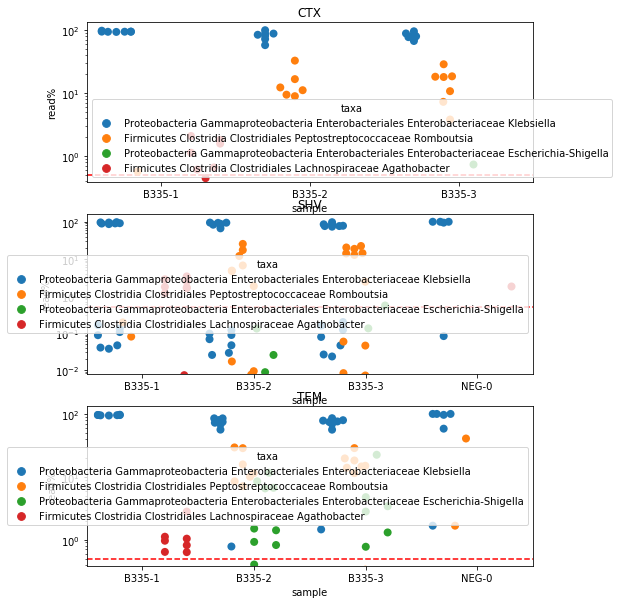

In [91]:

sample=["B335-1","B335-2","B335-3"]
genes=["CTX","SHV","TEM"]
hue_order=["Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella","Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia",
           "Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella","Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter"]
f, axes = plt.subplots(3, figsize=(8,10), squeeze=False)
plt.rcParams['svg.fonttype'] = 'none'
for i in range(3):
    sns.swarmplot(x="sample", y="read%", hue="taxa", data=this_graph[this_graph['gene']==genes[i]], dodge=True, size=8, 
                  hue_order=hue_order, ax=axes[i][0]).set_title(genes[i])
    
    axes[i][0].set_yscale("log")
    axes[i][0].axhline(0.5, color='r', ls='--')
plt.savefig("B335_ARG_log_swarm_no_trim.svg", format='svg')

In [74]:


cut_thresh=1
cut_list=[]
for row in untrimmed_df.iterrows():
    per=row[1]['read%']
    if per > cut_thresh:
        cut_list.append(1)
    else:
        cut_list.append(0)
untrimmed_df['cut_off']=cut_list

#full_df.head()

rep_list=['exp','taxa','sample','gene']
count_df=untrimmed_df.groupby(rep_list)['cut_off'].aggregate('sum').rename("detections").reset_index()
detect_df=pd.merge(untrimmed_df, count_df, on=rep_list)
multi_df=detect_df[(detect_df.exp == 'multi') & (detect_df.detections == 4)]
single_df=detect_df[(detect_df.exp == 'Single') & (detect_df.detections == 3)]
exception_df=detect_df[(detect_df.exp == 'Single') & (detect_df.time==2) & (detect_df.gene=='CTX') & (detect_df.rep != 'A') & (detect_df.detections >= 2)]
tran_df=detect_df[(detect_df.exp == 'transposon') & (detect_df.detections == 3)]
trimmed_df=pd.concat([multi_df, single_df,exception_df,tran_df])
trimmed_df.head()

,Unnamed: 0,file,rep,sample,patient,time,exp,gene,num,blast_hit,...,Family,Genus,sum_size,blast_summary,otu,sample_size,read%,taxa,cut_off,detections
58,55,037-B335_1-CTX,A,B335-1,B335,1,multi,CTX,37,CTX_G1_15_C52,...,Enterobacteriaceae(100),Klebsiella(62),7483,100.0;20;0;0;1;20;1;20;1.67e-08,otu12,7966,93.936731,Bacteria(100); Proteobacteria(100); Gammaprote...,1,4
59,59,038-B335_1-CTX,B,B335-1,B335,1,multi,CTX,38,CTX_G1_15_C52,...,Enterobacteriaceae(100),Klebsiella(62),8846,100.0;20;0;0;1;20;1;20;1.67e-08,otu23,9345,94.660246,Bacteria(100); Proteobacteria(100); Gammaprote...,1,4
60,61,039-B335_1-CTX,C,B335-1,B335,1,multi,CTX,39,CTX_G1_15_C52,...,Enterobacteriaceae(100),Klebsiella(62),12592,100.0;20;0;0;1;20;1;20;1.67e-08,otu3,13339,94.399880,Bacteria(100); Proteobacteria(100); Gammaprote...,1,4
61,64,040-B335_1-CTX,D,B335-1,B335,1,multi,CTX,40,CTX_G1_15_C52,...,Enterobacteriaceae(100),Klebsiella(62),11014,100.0;20;0;0;1;20;1;20;1.67e-08,otu478,11593,95.005607,Bacteria(100); Proteobacteria(100); Gammaprote...,1,4
74,74,041-B335_1-SHV,A,B335-1,B335,1,multi,SHV,41,SHV_ALL_C148,...,Lachnospiraceae(100),Agathobacter(100),446,100.0;25;0;0;1;25;1;25;2.3999999999999998e-11,otu29,13318,3.348851,Bacteria(100); Firmicutes(100); Clostridia(100...,1,4


# Final version
### I just took all the connections for the taxa I know pass the threshold and went through to manually parse them and fill in missing zeros

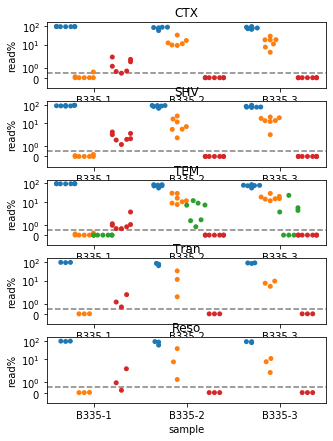

In [139]:
zero_filled_df=pd.read_csv("tab_zeros_filled_graphing.txt", sep='\t')

sample=["B335-1","B335-2","B335-3"]

genes=["CTX","SHV","TEM","Tran", "Reso"]
hue_order=["Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella","Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia",
           "Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella","Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter"]
f, axes = plt.subplots(5, figsize=(5,7), squeeze=False)
plt.rcParams['svg.fonttype'] = 'none'
for i in range(5):
    sns.swarmplot(x="sample", y="read%", hue="taxa", data=zero_filled_df[zero_filled_df['gene']==genes[i]], dodge=True, size=5, 
                  hue_order=hue_order, ax=axes[i][0]).set_title(genes[i])
    axes[i][0].legend().set_visible(False)
    axes[i][0].set_yscale("symlog")
    axes[i][0].set_ylim(bottom = -1)
    axes[i][0].axhline(0.5, color='grey', ls='--')
plt.savefig("B335_ARG_log_swarm_ZEROS_small.svg", format='svg')

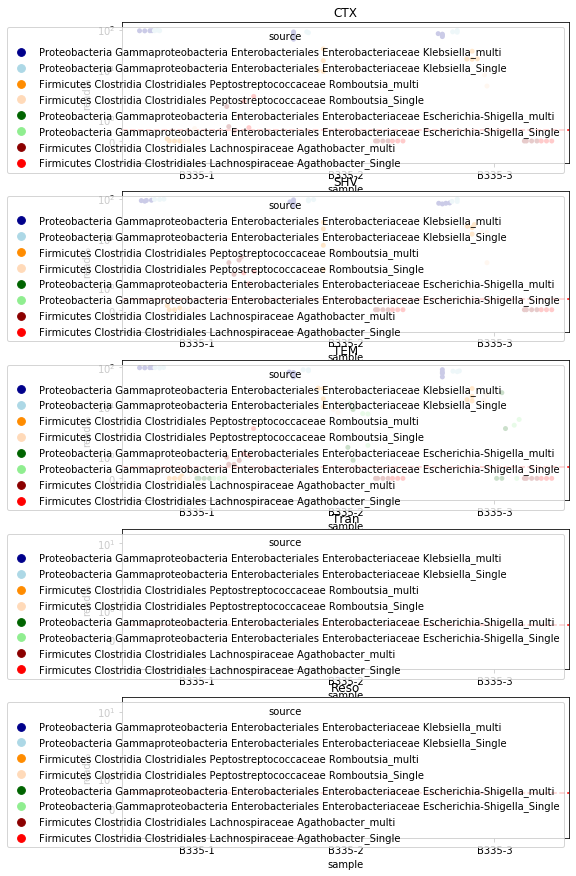

In [128]:
zero_filled_df=pd.read_csv("tab_zeros_filled_graphing.txt", sep='\t')
zero_filled_df["source"]=zero_filled_df["taxa"]+"_"+zero_filled_df["exp"]
sample=["B335-1","B335-2","B335-3"]
genes=["CTX","SHV","TEM","Tran", "Reso"]
hue_order=["Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella_multi","Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Klebsiella_Single",
           "Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia_multi","Firmicutes Clostridia Clostridiales Peptostreptococcaceae Romboutsia_Single",
           "Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella_multi","Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae Escherichia-Shigella_Single",
           "Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter_multi","Firmicutes Clostridia Clostridiales Lachnospiraceae Agathobacter_Single"]
palette = ['darkblue','lightblue','darkorange','peachpuff','darkgreen','lightgreen','darkred','red']

f, axes = plt.subplots(5, figsize=(8,15), squeeze=False)
plt.rcParams['svg.fonttype'] = 'none'
for i in range(5):
    sns.swarmplot(x="sample", y="read%", hue="source", data=zero_filled_df[zero_filled_df['gene']==genes[i]], dodge=True, size=5, 
                  hue_order=hue_order, palette=palette, edgecolor="black", ax=axes[i][0]).set_title(genes[i])
    
    axes[i][0].set_yscale("symlog")
    axes[i][0].set_ylim(bottom = -1)
    axes[i][0].axhline(0.5, color='r', ls='--')
plt.savefig("B335_ARG_log_swarm_ZEROS_split_exp.svg", format='svg')






In [142]:
romb_reads = pd.read_csv("rev_romb_read_totals.txt", sep='\t')
romb_reads

,sample,rep,read_count
0,B335-3,A,39158
1,B335-3,B,29653
2,B335-3,C,17548
3,B335-2,A,32063
4,B335-2,B,19348
5,B335-2,C,12487
6,B335-1,A,1
7,B335-1,B,51
8,B335-1,C,3


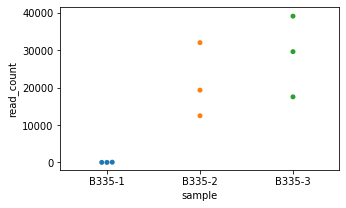

In [151]:
#f, axes = plt.subplots(5, figsize=(5,7), squeeze=False)
romb_reads = pd.read_csv("rev_romb_read_totals.txt", sep='\t')

fig, ax = plt.subplots(figsize=(5,3))
plt.rcParams['svg.fonttype'] = 'none'

sns.swarmplot(x="sample",y="read_count", data=romb_reads)

plt.savefig("rev_romb_swarm_total_reads.svg", format="svg")